## Importing Libraries

In [198]:
!pip install folium
!pip install geopandas

In [199]:

import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import folium
from shapely.geometry import Point
import matplotlib.pyplot as plt



## Loading Data

In [200]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [201]:
listing_item = pd.read_csv('/content/drive/MyDrive/unmazer.ai/listings.csv')
neighbourhood = gpd.read_file('/content/drive/MyDrive/unmazer.ai/neighbourhoods.geojson')


# Understanding the data



In [202]:
listing_item.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2265,Zen-East in the Heart of Austin (monthly rental),2466,Paddy,NaN,78702,30.27750,-97.71398,Entire home/apt,200,7,24,2019-03-16,0.17,3,131
1,5245,"Eco friendly, Colorful, Clean, Cozy monthly share",2466,Paddy,NaN,78702,30.27577,-97.71379,Private room,114,30,9,2018-03-14,0.06,3,0
2,5456,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,NaN,78702,30.26112,-97.73448,Entire home/apt,104,2,543,2021-02-01,3.74,1,354
3,5636,"Soco, Barton Springs Private Guest Cottage",7148,Peggy,NaN,78704,30.24630,-97.76361,Entire home/apt,46,30,21,2020-11-06,0.15,2,67
4,5769,NW Austin Room,8186,Elizabeth,NaN,78729,30.45697,-97.78422,Private room,39,1,259,2021-02-10,1.96,1,79


In [203]:
neighbourhood.head()

,neighbourhood,neighbourhood_group,geometry
0,78739,None,"MULTIPOLYGON (((-97.89002 30.20941, -97.88929 ..."
1,78754,None,"MULTIPOLYGON (((-97.63658 30.40266, -97.63754 ..."
2,78732,None,"MULTIPOLYGON (((-97.87303 30.43806, -97.87335 ..."
3,78737,None,"MULTIPOLYGON (((-98.01876 30.24167, -98.01617 ..."
4,78756,None,"MULTIPOLYGON (((-97.72792 30.32906, -97.72760 ..."


In [204]:
listing_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10272 entries, 0 to 10271
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              10272 non-null  int64  
 1   name                            10272 non-null  object 
 2   host_id                         10272 non-null  int64  
 3   host_name                       10267 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   10272 non-null  int64  
 6   latitude                        10272 non-null  float64
 7   longitude                       10272 non-null  float64
 8   room_type                       10272 non-null  object 
 9   price                           10272 non-null  int64  
 10  minimum_nights                  10272 non-null  int64  
 11  number_of_reviews               10272 non-null  int64  
 12  last_review                     

In [205]:
neighbourhood.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   neighbourhood        44 non-null     object  
 1   neighbourhood_group  0 non-null      object  
 2   geometry             44 non-null     geometry
dtypes: geometry(1), object(2)
memory usage: 1.2+ KB


## Ques 1 : To find the top areas with highest number of listings.

Need to find the latitudes and longitudes of the areas having the highest listing counts and plot according to their neighborhoods.

In [206]:
df = listing_item[['neighbourhood','calculated_host_listings_count','latitude','longitude']].sort_values(by = 'calculated_host_listings_count', ascending = False)
df = df[df['calculated_host_listings_count'] == max(df['calculated_host_listings_count'])]
df.head()

,neighbourhood,calculated_host_listings_count,latitude,longitude
9048,78727,358,30.43495,-97.73015
8579,78702,358,30.28087,-97.70993
8597,78729,358,30.45118,-97.77480
9929,78745,358,30.20007,-97.77253
8596,78729,358,30.45118,-97.77480


In [207]:
longitudes = list(df['longitude'].values)
latitudes = list(df['latitude'].values)
neighbors = list(df['neighbourhood'].unique())
neighbors = [str(x) for x in neighbors]

geometry = [Point(xy) for xy in zip(longitudes,latitudes)]
points_df = gpd.GeoDataFrame(geometry = geometry)
neighbour_df = neighbourhood[neighbourhood['neighbourhood'].isin(neighbors)]

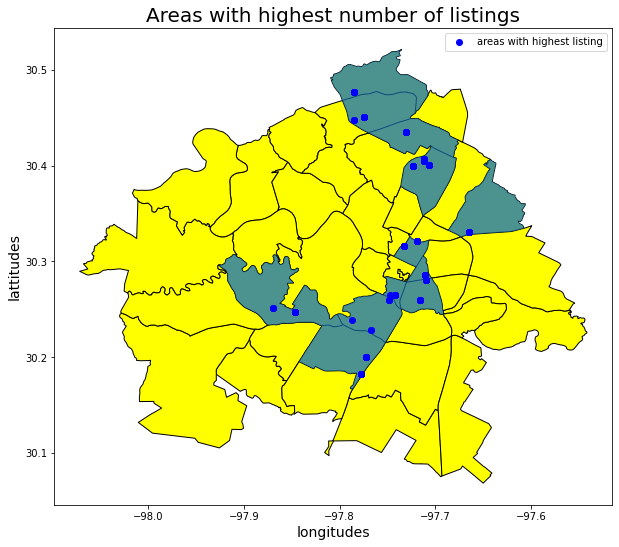

In [208]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
plt.title("Areas with highest number of listings", fontsize=20)
plt.xlabel('longitudes', fontsize=14)
plt.ylabel('lattitudes', fontsize=14)

neighbourhood.plot(ax=ax, color='yellow', edgecolor='black')
neighbour_df.plot(ax=ax, alpha = 0.8, label = 'neighbors having highest listing')
points_df.plot(ax=ax, color = 'b', label = 'areas with highest listing')
plt.legend(loc=0)
plt.show()

## Ques 2: Thematic map of neighborhood, broken down by single room, entire home.

We calculated the number of a particular type of rooms per neighbourhood  and now we plot the thematic map.

# For entire home or apartment




In [209]:
df_1 = listing_item[listing_item['room_type'] == 'Entire home/apt'][['neighbourhood','room_type']].reset_index()
series1 = df_1['neighbourhood'].value_counts()

In [210]:
for i in neighbourhood.index:
  for j in series1.index:
    if (neighbourhood['neighbourhood'][i] == str(j)):
      neighbourhood.loc[i,'entire_home_count'] = series1[j]
neighbourhood.head()

,neighbourhood,neighbourhood_group,geometry,entire_home_count
0,78739,None,"MULTIPOLYGON (((-97.89002 30.20941, -97.88929 ...",19.0
1,78754,None,"MULTIPOLYGON (((-97.63658 30.40266, -97.63754 ...",49.0
2,78732,None,"MULTIPOLYGON (((-97.87303 30.43806, -97.87335 ...",41.0
3,78737,None,"MULTIPOLYGON (((-98.01876 30.24167, -98.01617 ...",89.0
4,78756,None,"MULTIPOLYGON (((-97.72792 30.32906, -97.72760 ...",98.0


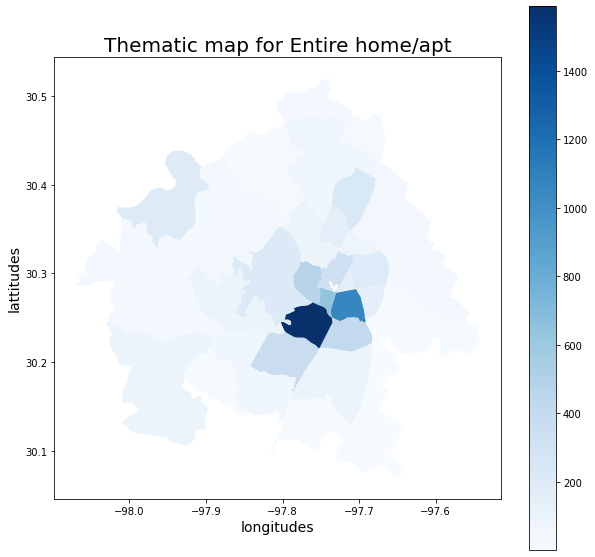

In [211]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
plt.title("Thematic map for Entire home/apt", fontsize=20)
plt.xlabel('longitudes', fontsize=14)
plt.ylabel('lattitudes', fontsize=14)

neighbourhood.plot(column='entire_home_count', ax=ax, legend=True,cmap='Blues')

## for private room



In [212]:
df2 = listing_item[listing_item['room_type'] == 'Private room'][['neighbourhood','room_type']].reset_index()
series2 = df2['neighbourhood'].value_counts()

In [213]:
for i in neighbourhood.index:
  for j in series2.index:
    if (neighbourhood['neighbourhood'][i] == str(j)):
      neighbourhood.loc[i,'private_room_count'] = series2[j]
neighbourhood.head()

,neighbourhood,neighbourhood_group,geometry,entire_home_count,private_room_count
0,78739,None,"MULTIPOLYGON (((-97.89002 30.20941, -97.88929 ...",19.0,6.0
1,78754,None,"MULTIPOLYGON (((-97.63658 30.40266, -97.63754 ...",49.0,57.0
2,78732,None,"MULTIPOLYGON (((-97.87303 30.43806, -97.87335 ...",41.0,6.0
3,78737,None,"MULTIPOLYGON (((-98.01876 30.24167, -98.01617 ...",89.0,8.0
4,78756,None,"MULTIPOLYGON (((-97.72792 30.32906, -97.72760 ...",98.0,21.0


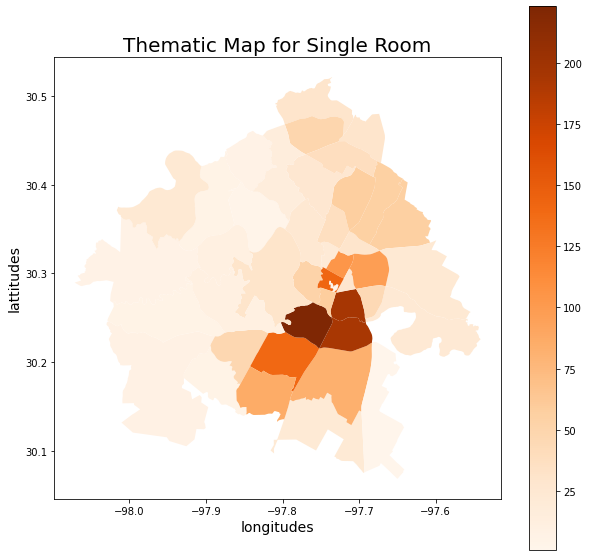

In [214]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
plt.title("Thematic Map for Single Room", fontsize=20)
plt.xlabel('longitudes', fontsize=14)
plt.ylabel('lattitudes', fontsize=14)

neighbourhood.plot(column='private_room_count', ax=ax, legend=True,cmap='Oranges')

## Ques 3: To find the top 10 hosts by total number of listings

The task is to find the top 10 hosts who has highest number of listings. The dataset is divided based on the host name and host ID for the given solution

In [215]:
top10 = listing_item.groupby(by = ['host_id','host_name']).sum('calculated_host_listings_count').sort_values(by = 'calculated_host_listings_count', ascending = False).reset_index()
top10 = top10[['host_id','host_name','calculated_host_listings_count']][:10]
top10

,host_id,host_name,calculated_host_listings_count
0,359036978,Kia,128164
1,104309976,WanderJaunt,17161
2,109638288,TurnKey Vacation Rentals,6724
3,8167447,Martin,6561
4,118565935,Renters Club,3136
5,346827202,Madalynn,2304
6,194953121,Christian,2025
7,210733801,Above,1849
8,368944610,Kia,1600
9,124060715,Evolve Vacation Rental,1444


##Ques 4: One Metric from the insight 

The question is to find a neighbourhood whose mean price for the stay is reasonable. We can make metric called minimum price for staying which is essentially the product of price per night and minimum number of nights for staying


For entire home/apt


In [216]:
entireHome = listing_item[listing['room_type']=='Entire home/apt']
entireHome['minimum_price for stay'] = entireHome['minimum_nights']*entireHome['price']
entireHome = entireHome.groupby(by='neighbourhood').mean('minimum_price for stay')['minimum_price for stay'].sort_values()

NameError: ignored

In [ ]:
mean = entireHome.mean()
sd = np.sqrt(entireHome.var())
median = entireHome.median()
print('median = ',median,'\nmean = ',mean,'\nstandard deviation = ',sd)

From the above stats , we can see that the histogram of the minimum price for staying is left skewed so median would give us the neighbourhood having the houses having the most economical price.

In [ ]:
for i in neighbourhood.index:
  for j in entireHome.index:
    if (neighbourhood['neighbourhood'][i] == str(j)):
      neighbourhood.loc[i,'price_for_stay_home'] = entireHome[j]

The following are the neighbourhoods which are around the median for entire home/apt:

In [ ]:
m1 = (len(neighbourhood['neighbourhood'])//2)-2
m2 = (len(neighbourhood['neighbourhood'])//2)+2
print('The neighbourhoods median with index ranging from',m1,'and',m2)

In [ ]:
neighbourhood_entireHome = neighbourhood[['price_for_stay_home','neighbourhood','geometry']].sort_values(by='price_for_stay_home')
neighbourhood_entireHome = neighbourhood_entireHome.reset_index(drop=True)
neighbourhood_entireHome = neighbourhood_entireHome[['price_for_stay_home','neighbourhood','geometry']][m1:m2]
neighbourhood_entireHome

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
plt.title("Neighbourhoods which are Economical for Entire Home/apt", fontsize=16)
plt.xlabel('longitudes', fontsize=12)
plt.ylabel('lattitudes', fontsize=12)
neighbourhood.plot(ax=ax, legend=True,color='white',edgecolor='black')
neighbourhood_entireHome.plot(ax=ax, legend=True,color='blue')

###For private Room

In [ ]:
privateRoom = listing_item[listing_item['room_type']=='Private room']
privateRoom = privateRoom.reset_index(drop=True)
for i in range(len(privateRoom)):
  privateRoom.loc[i,'minimum_price for stay'] = privateRoom.loc[i,'minimum_nights']*privateRoom.loc[i,'price']
privateRoom = privateRoom.groupby(by='neighbourhood').mean('minimum_price for stay')['minimum_price for stay'].sort_values()

In [ ]:
mean = privateRoom.mean()
sd = np.sqrt(privateRoom.var())
median = privateRoom.median()
print('median = ',median,'\nmean = ',mean,'\nstandard deviation = ',sd)

From the above stats, we can see that here we have same shape of data as  it is left skewed and median would give us the required solution.

In [ ]:
for i in neighbourhood.index:
  for j in privateRoom.index:
    if (neighbourhood['neighbourhood'][i] == str(j)):
      neighbourhood.loc[i,'price_for_stay_private'] = privateRoom[j]

The neighbourhoods which are around the median for private home:

In [ ]:
neighbourhood = neighbourhood[['price_for_stay_private','neighbourhood','geometry']].sort_values(by='price_for_stay_private')
neighbourhood = neighbourhood.reset_index(drop=True)
neighbourhood_privateRoom = neighbourhood[['price_for_stay_private','neighbourhood','geometry']][m1:m2]
neighbourhood_privateRoom

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
plt.title("Neighbourhoods that are Economical for Private Room", fontsize=16)
plt.xlabel('longitudes', fontsize=14)
plt.ylabel('lattitudes', fontsize=14)
neighbourhood.plot(ax=ax, legend=True,color='white',edgecolor='black')
neighbourhood_privateRoom.plot(ax=ax, legend=True,color='blue',edgecolor='black')


Hence for the observation if average salary person wants to have an entire home or private room he would start with what neighbours had obtained